In [1]:
Group Name - CS985MLDAGroup4
Maria Chiara Vernillo -qhb21198 
Ravina Suhagiya - 202187073
Viktoriia Khelemska - 202081049
Classification Score as on Kaggle - 0.36842

In [ ]:
# fundamental libraries as always 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
from sklearn.feature_selection import chi2
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.feature_selection import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [127]:
#We import the Train Dataset.

df = pd.read_csv(r"C:\Users\verni\Downloads\CLASS\CS98XClassificationTrain.csv")
df_test = pd.read_csv(r"C:\Users\verni\Downloads\CLASS\CS98XClassificationTest.csv")

In [128]:
df.shape

(453, 15)

## EDA

### First look at the dataset

In [3]:
df.head()

Id                                        title            artist  year  \
0   1                                 My Happiness    Connie Francis  1996   
1   2                             Unchained Melody   The Teddy Bears  2011   
2   3                        How Deep Is Your Love          Bee Gees  1979   
3   4                                Woman in Love  Barbra Streisand  1980   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John  1973   

   bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop        top genre  
0  107    31    45  -8    13   28  150     75     3   44  adult standards  
1  114    44    53  -8    13   47  139     49     3   37              NaN  
2  105    36    63  -9    13   67  245     11     3   77  adult standards  
3  170    28    47 -16    13   33  232     25     3   67  adult standards  
4  121    47    56  -8    15   40  193     45     3   63        glam rock

In [4]:
df.shape

(453, 15)

In [5]:
df.describe()

Id         year         bpm        nrgy        dnce  \
count  453.000000   453.000000  453.000000  453.000000  453.000000   
mean   227.000000  1991.443709  118.399558   60.070640   59.565121   
std    130.914094    16.776103   25.238713   22.205284   15.484458   
min      1.000000  1948.000000   62.000000    7.000000   18.000000   
25%    114.000000  1976.000000  100.000000   43.000000   49.000000   
50%    227.000000  1994.000000  119.000000   63.000000   61.000000   
75%    340.000000  2007.000000  133.000000   78.000000   70.000000   
max    453.000000  2019.000000  199.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean    -8.836645   17.757174   59.465784  226.278146   32.982340    5.660044   
std      3.577187   13.830300   24.539868   63.770380   29.530015    5.550581   
min    -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   
25%    -11.000000    9.000000   42.000000  181.000000    7.000000    3.000000   
50%     -8.000000   13.000000   61.000000  223.000000   24.000000    4.000000   
75%     -6.000000   23.000000   80.000000  262.000000   58.000000    6.000000   
max     -1.000000   93.000000   99.000000  511.000000  100.000000   47.000000   

              pop  
count  453.000000  
mean    60.743929  
std     13.470083  
min     26.000000  
25%     53.000000  
50%     63.000000  
75%     71.000000  
max     84.000000

### Finding and treating null values

In [6]:
pd.isna(df).sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [7]:
df = df.dropna()
df.shape

(438, 15)

### Finding and treating outliers

We now plot a bloxplot to look at the distribution of the numerical variables. The data is not yet scaled, but such a visualisation is nonetheless helpuful for our investigation.

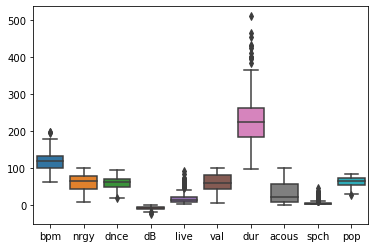

In [8]:
ax = sns.boxplot(data=df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']], orient='v')

It appears that duration, live, and bpm have outliers. 

##### Treating outliers: dur.

In [9]:
#Now we look for outliers using the interquartile range for the 
#duration variable
Q1 = np.percentile(df['dur'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['dur'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

#We now look at the upper and lower bounds, and treat the outliers
#by dropping them as they could skew our results later in the analysis. 

upper = np.where(df['dur'] >= (Q3 + 1.5*IQR))
lower = np.where(df['dur'] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

df.shape

(426, 15)

##### Treating outliers: bpm

In [10]:
Q1 = np.percentile(df['bpm'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['bpm'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['bpm'] >= (Q3 + 1.5*IQR))
lower = np.where(df['bpm'] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

df.shape

(423, 15)

##### Treating outliers: live.

In [11]:
Q1 = np.percentile(df['live'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['live'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(df['live'] >= (Q3 + 1.5*IQR))
lower = np.where(df['live'] <= (Q1 - 1.5*IQR))

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

df.shape

(400, 15)

#### We look at the variables

##### top genre

In [12]:
#We check the ratio of the genres:

ratio_genres = df['top genre'].value_counts()/len(df['top genre'])
ratio_genres

adult standards       0.1550
album rock            0.1475
dance pop             0.1425
brill building pop    0.0350
glam rock             0.0350
                       ...  
r&b                   0.0025
classic danish pop    0.0025
blues                 0.0025
german dance          0.0025
british blues         0.0025
Name: top genre, Length: 84, dtype: float64

In [13]:
#Plot: genres and number of occurrences. 
genres= df['top genre'].value_counts().head(10).to_frame().reset_index()
genres.columns = ['genre','Number of songs']
genre = list(genres['genre'])
px.bar(genres, 
       x = 'genre', 
       y = 'Number of songs', 
       title = 'Top 10 Genres')


In [14]:
unique_genre=df['top genre'].unique()
len(unique_genre)

84

In [15]:
#Plot: genre by average popularity score

genre_pop = df.groupby('top genre').mean().sort_values('pop', ascending=True)[:82].reset_index()
px.bar(x='top genre', y='pop', data_frame = genre_pop, color='pop', title = 'Genres by average popularity score')


As we can see from the graph, the genre with the highest average popularity score is detroit hip hop with an average popularity score of 78.

#### Genre and Bpm

We expect the bpm to be linked with the genre of a song. The next graph shows that generally songs with different average bpm belong to different genres. 

In [16]:
#Plot: genres and bpm.
genre_bpm = df.groupby('top genre').mean().sort_values('bpm', ascending=True)[:82].reset_index()
px.bar(x='top genre', y='bpm', data_frame = genre_bpm, color='bpm', title="Genres by average bpm")

#### Genre and acoustiness

As well as for the bpm, we would expect acoustiness to differ on average across genres.

In [17]:
#Plot: genre and acousticness. 
genre_acous = df.groupby('top genre').mean().sort_values('acous', ascending=True)[:82].reset_index()
px.bar(x='top genre', y='acous', data_frame = genre_acous, color = 'acous', title='Acousticness by genre')

#### Genre and danceability

Another determining factor of a genre is expected to be its danceability. In rough, trivial terms, classical music is not expected to be as danceable as house music, for example.

In [18]:
genre_dnce = df.groupby('top genre').mean().sort_values('dnce', ascending=True)[:82].reset_index()
px.bar(x='top genre', y='dnce', data_frame = genre_dnce, color = 'dnce', title="Danceability by genre")

#Danceability seems to be a determing feature in descerning the genre of a song. 

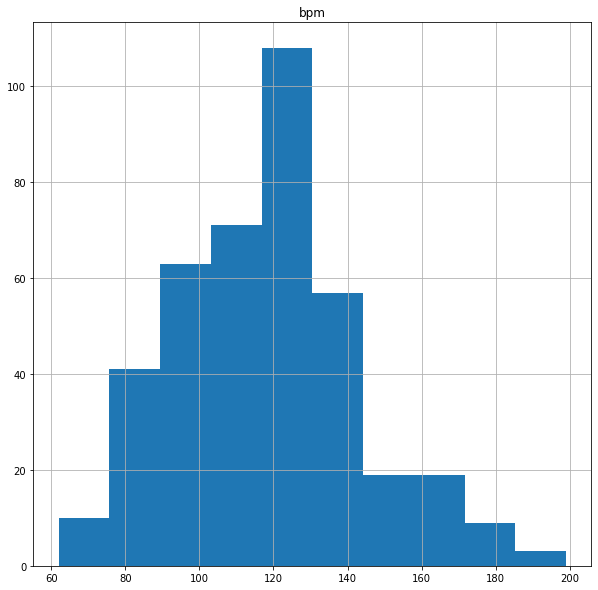

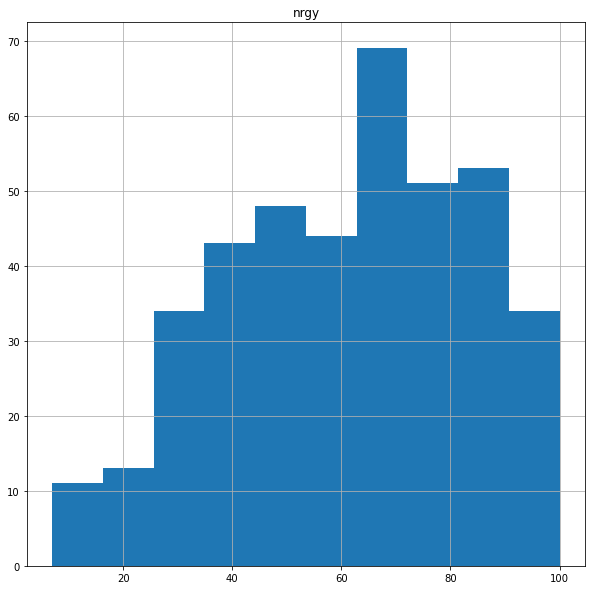

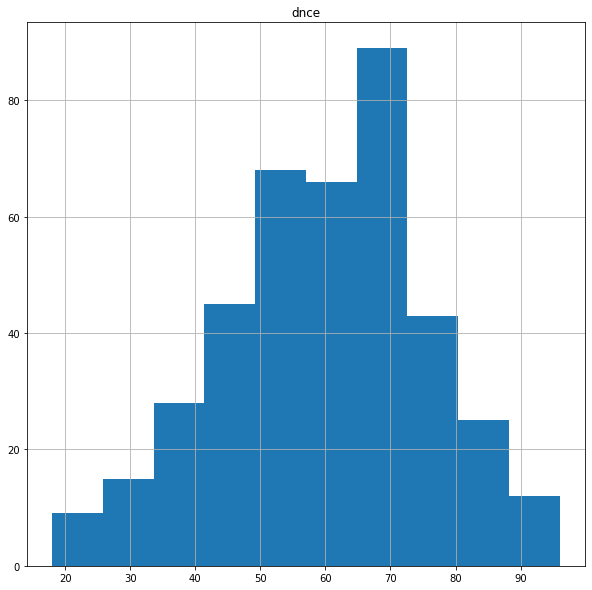

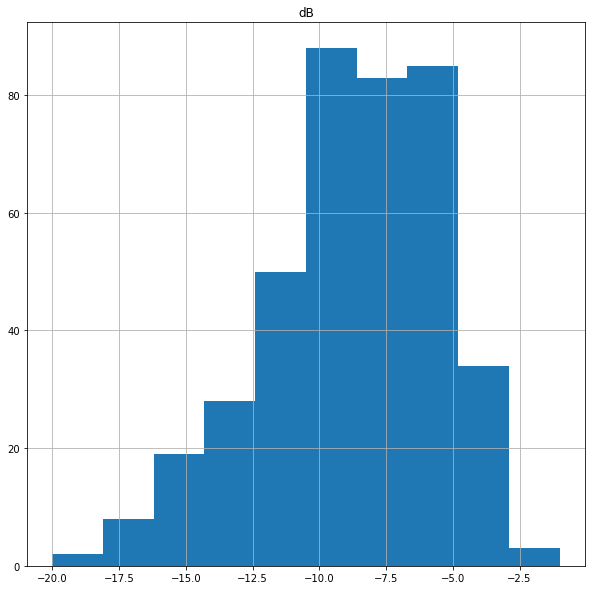

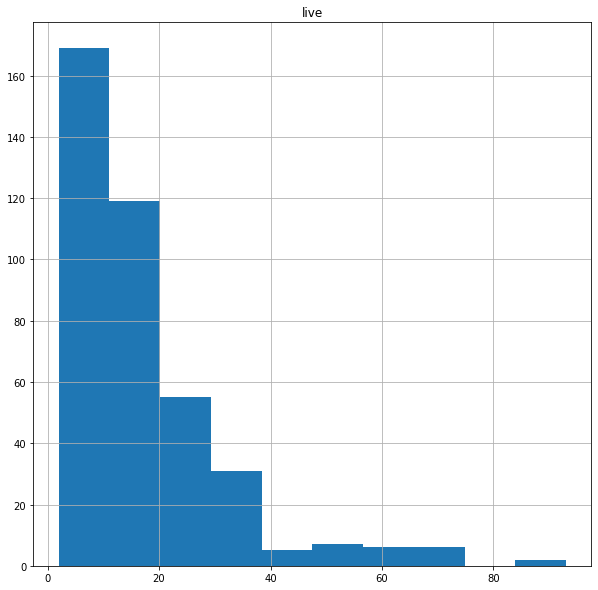

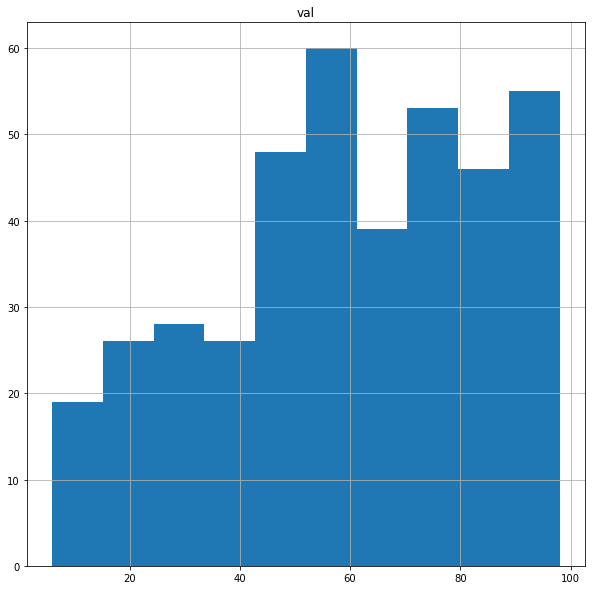

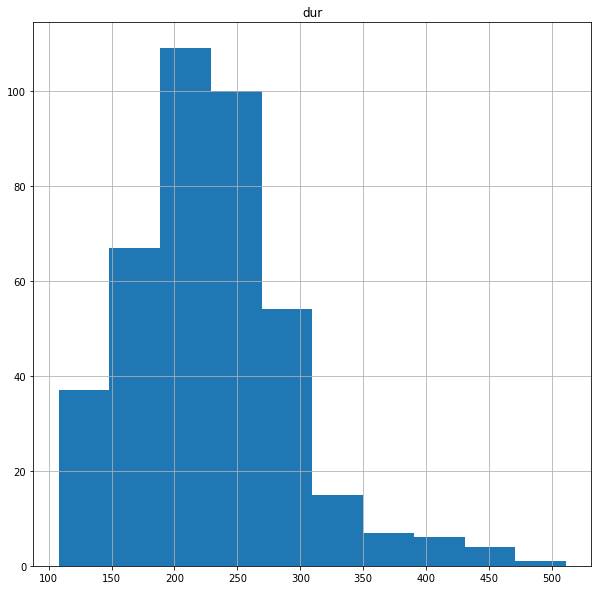

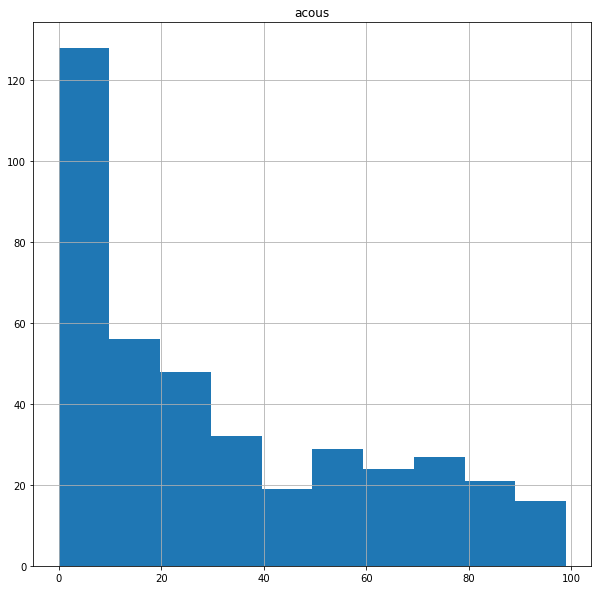

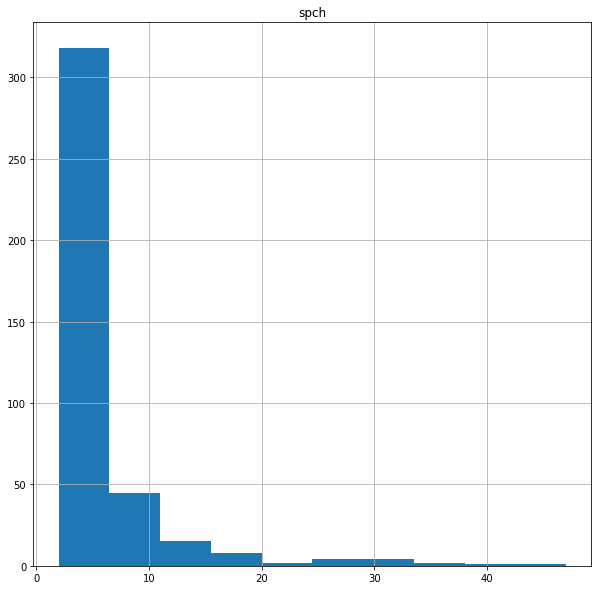

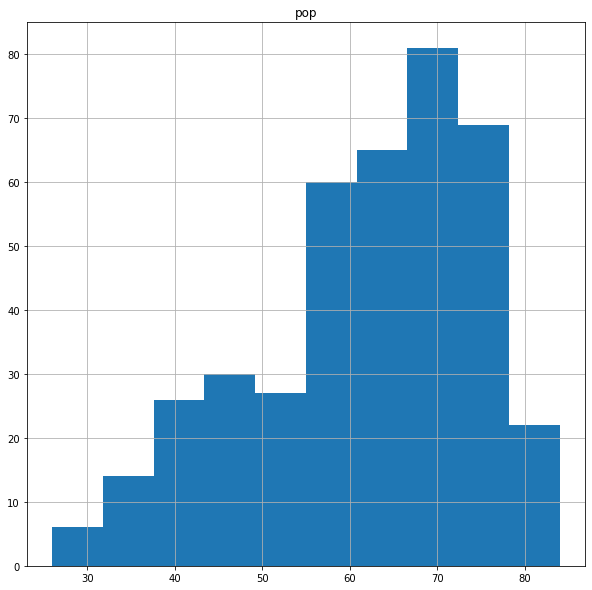

In [19]:
df_histograms = df.copy()
df_histograms = df_histograms.drop(labels = ['Id', 'title', 'artist', 'top genre', 'year'], axis=1)
for column in df_histograms.columns:
    df_histograms[column].hist(figsize=(10, 10))
    plt.title(column)
    plt.show()

## Correlation

We now investigate the correlation between variables.

### Label Encoding

As we are studying the numerical correlation between a categorical 
variable, top genres, with numerical and categorical variables, 
it is not possible to proceed straightforward to the plot of an heatmap or to the calculation of any type of correlation coefficient.
Therefore, we have to first label encode the categorical variables so that they can be expressed in numerical terms. The disadvantage is that with label encoding the algorithms applied to the dataset might misinterpret the numerical values as having some sort of internal hierarchy.

In [21]:
unique_artists = df['artist'].unique()
unique_artists.shape

(307,)

In [22]:
encoder = LabelEncoder()
df2 = df.copy()
df2['Categorical_genres'] = encoder.fit_transform(df['top genre'])
df2

Id                                        title            artist  year  \
0      1                                 My Happiness    Connie Francis  1996   
2      3                        How Deep Is Your Love          Bee Gees  1979   
3      4                                Woman in Love  Barbra Streisand  1980   
4      5  Goodbye Yellow Brick Road - Remastered 2014        Elton John  1973   
5      6                                      Grenade        Bruno Mars  2010   
..   ...                                          ...               ...   ...   
448  449                               But Not For Me   Ella Fitzgerald  1959   
449  450                                    Surf City        Jan & Dean  2010   
450  451                                      Dilemma             Nelly  2002   
451  452                             It's Gonna Be Me            *NSYNC  2000   
452  453                              In The Army Now        Status Quo  2002   

     bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  \
0    107    31    45  -8    13   28  150     75     3   44   
2    105    36    63  -9    13   67  245     11     3   77   
3    170    28    47 -16    13   33  232     25     3   67   
4    121    47    56  -8    15   40  193     45     3   63   
5    110    56    71  -7    12   23  223     15     6   74   
..   ...   ...   ...  ..   ...  ...  ...    ...   ...  ...   
448   80    22    18 -17    10   16  214     92     4   45   
449  148    81    53 -13    23   96  147     50     3   50   
450  168    55    73  -8    20   61  289     23    14   77   
451  165    87    64  -5     6   88  191      5     8   62   
452  105    73    68  -8    14   94  281     11     2   59   

              top genre  Categorical_genres  
0       adult standards                   1  
2       adult standards                   1  
3       adult standards                   1  
4             glam rock                  68  
5                   pop                  79  
..                  ...                 ...  
448     adult standards                   1  
449  brill building pop                  25  
450           dance pop                  51  
451            boy band                  24  
452          album rock                   4  

[400 rows x 16 columns]

###### One-Hot Encoding

One hot encoding assings a 1 (True) or 0 (False) to the column. The downside of this approach, which in turn addresses the hierarchy issue, is that it adds many columns to the dataset. Moreover, there is a very high cardinality of the artist column.

##### Correlation Matrix

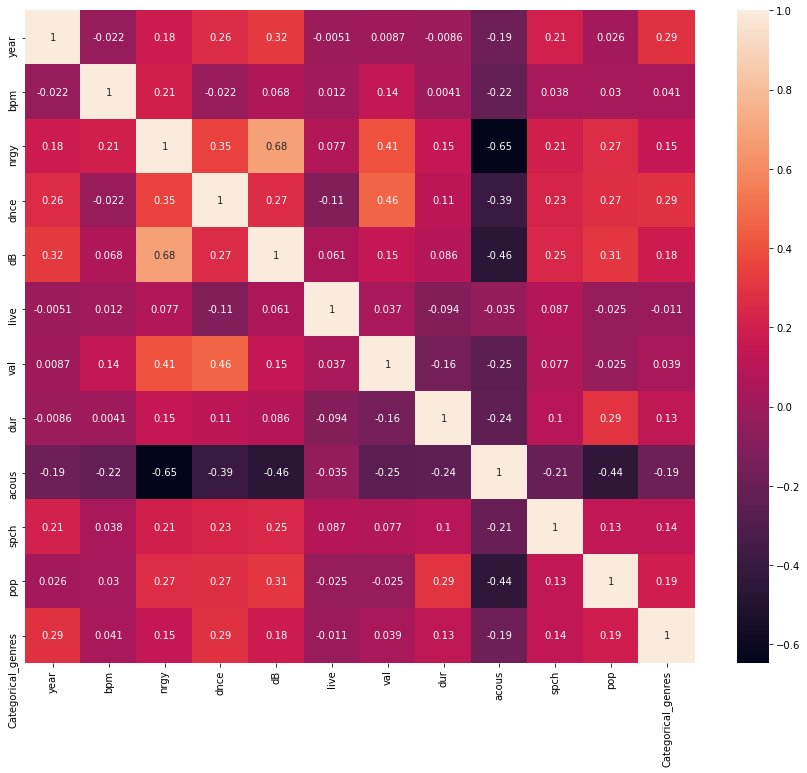

In [23]:
#Correlation matrix. 
#We investigate the covariance between variables. 
df_corr = df2.drop(df2[['Id', 'title']], axis=1)
corr = df_corr.corr()
plt.figure(figsize = (15, 12))
cov = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [24]:
pearson = df_corr.corr()["Categorical_genres"] # Pearson is default
spearman= df_corr.corr(method='spearman')["Categorical_genres"]
kendall = df_corr.corr(method='kendall')["Categorical_genres"]

print("Pearson Correlation")
print(pearson.sort_values(ascending=False))
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("Spearman Correlation")
print(spearman.sort_values(ascending=False))
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("Kendall Correlation")
print(kendall.sort_values(ascending=False))
print("---------------------------")
print("---------------------------")
print("---------------------------")
print("---------------------------")

Pearson Correlation
Categorical_genres    1.000000
year                  0.286576
dnce                  0.286529
pop                   0.193344
dB                    0.178224
nrgy                  0.150564
spch                  0.135295
dur                   0.130639
bpm                   0.041219
val                   0.039316
live                 -0.011067
acous                -0.185748
Name: Categorical_genres, dtype: float64
---------------------------
---------------------------
---------------------------
---------------------------
Spearman Correlation
Categorical_genres    1.000000
dnce                  0.303932
year                  0.267652
pop                   0.218472
dur                   0.194075
dB                    0.191195
nrgy                  0.180661
spch                  0.103465
bpm                   0.070583
val                   0.066366
live                 -0.022079
acous                -0.207240
Name: Categorical_genres, dtype: float64
---------------------

It is not possible to reach the same level of simplicity in the visualisation with the one-hot encoded dataset. 

### Feature Selection (Label encoded df)

In [99]:
#y_train = df2['Categorical_genres']
X_train = df2.drop(labels=['Id', 'Categorical_genres', 'top genre','title'], axis=1) # we drop the target variable and redundant variables
X_test = df_test.drop(labels=['title', 'Id',], axis=1)

In [156]:
y_train = df['top genre']
#label encode it
encoder_y_train = encoder.fit(y_train) 
y_train = encoder.fit_transform(y_train)

In [157]:
encoder_y_train.classes_

array(['acoustic blues', 'adult standards', 'afrobeat', 'afropop',
       'album rock', 'alternative metal', 'alternative rock',
       'american folk revival', 'art pop', 'art rock', 'atl hip hop',
       'australian rock', 'australian talent show', 'avant-garde jazz',
       'barbadian pop', 'baroque pop', 'bebop', 'belgian dance',
       'belgian pop', 'big room', 'blues', 'blues rock', 'boogaloo',
       'bow pop', 'boy band', 'brill building pop', 'brit funk',
       'british blues', 'british comedy', 'british dance band',
       'british folk', 'british invasion', 'british soul', 'britpop',
       'bronx hip hop', 'bubble trance', 'bubblegum dance',
       'bubblegum pop', 'canadian folk', 'canadian pop', 'celtic rock',
       'chanson', 'chicago rap', 'chicago soul', 'classic danish pop',
       'classic girl group', 'classic rock', 'classic soul',
       'classic uk pop', 'country', 'country rock', 'dance pop',
       'dance rock', 'deep adult standards', 'deep house',
       '

In [101]:
X_train['Artists'] = encoder.fit_transform(X_train['artist'])
#label encode artists

In [102]:
X_test['Artists'] = encoder.fit_transform(X_test['artist'])
#label encode artists

In [103]:
X_train = X_train.drop('artist', axis=1)
X_test = X_test.drop('artist', axis=1)

In [30]:
#Hot encoding does not work because the years
#in X_train are not the same as in X_test

#X_train = pd.get_dummies(X_train, columns = ['year'], prefix=None, prefix_sep="")
#X_test = pd.get_dummies(X_test, columns = ['year'], prefix=None, prefix_sep="")

In [98]:
#X_train.info()

To avoid multicollinearity, we drop one of the year columns.

In [32]:
#X_train = X_train.drop('year2019', axis=1)
#X_test = X_test.drop('year2019', axis=1)

Since we have negative numbers for the decibels, we will use a minmax scaler, which scales the variables to a range (we set to be) between 0 and 1. 

In [104]:
#X_train
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train) #apply the scaler
X_train = pd.DataFrame(X_scaled, index = X_train.index, columns = X_train.columns)

#X_test

scaler.fit(X_test)
X_tscaled = scaler.transform(X_test)
X_test= pd.DataFrame(X_tscaled, index = X_test.index, columns = X_test.columns)

As we are dealing with a classification task, I am going to carry an Anova (Analysis of Variance) of our variables. 

In [105]:
from sklearn.feature_selection import f_classif

In [106]:
f_score = f_classif(X_train, y_train)

I get the p-values:

In [107]:
p_values=pd.Series(f_score[1])
p_values.index=X_train.columns

print("################################")
print("The p-values are:")
print(p_values.sort_values(ascending=True))
print("################################")

################################
The p-values are:
spch       2.353161e-24
acous      3.227801e-18
pop        3.733783e-18
dur        6.102135e-18
nrgy       1.240282e-17
year       3.512211e-17
dB         1.885997e-12
dnce       1.556524e-08
Artists    3.024482e-05
live       3.346414e-02
val        4.518454e-02
bpm        1.310899e-01
dtype: float64
################################


In [108]:
print("At the 1% significance level:")
print(str(p_values<=0.01))

print("----------------")
print("----------------")
print("----------------")

print("At the 5% significance level:")
print(str(p_values<=0.05))

print("----------------")
print("----------------")
print("----------------")

print("At the 10% significance level:")
print(str(p_values<=0.1))

At the 1% significance level:
year        True
bpm        False
nrgy        True
dnce        True
dB          True
live       False
val        False
dur         True
acous       True
spch        True
pop         True
Artists     True
dtype: bool
----------------
----------------
----------------
At the 5% significance level:
year        True
bpm        False
nrgy        True
dnce        True
dB          True
live        True
val         True
dur         True
acous       True
spch        True
pop         True
Artists     True
dtype: bool
----------------
----------------
----------------
At the 10% significance level:
year        True
bpm        False
nrgy        True
dnce        True
dB          True
live        True
val         True
dur         True
acous       True
spch        True
pop         True
Artists     True
dtype: bool


We now check for information gain. We use the mutual information measure. This is in a range between zero and one. If two variables are independent, then the MI will be zero as no information about Y can be gotten from X. 

In [109]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

In [110]:
info = mutual_info_classif(X_train,y_train)

In [111]:
info = pd.Series(info)
info.index = X_train.columns

print("Mutual information (0: no info, 1: info)")
print(str(info.sort_values(ascending=False)))

Mutual information (0: no info, 1: info)
Artists    0.788251
year       0.640838
dur        0.390919
pop        0.252266
dB         0.240489
acous      0.219569
nrgy       0.211467
spch       0.207227
dnce       0.202312
bpm        0.080556
val        0.060886
live       0.059975
dtype: float64


We want to select the most important features using the MI measure.

In [112]:
topselection = SelectKBest(mutual_info_classif, k=6)
topselection = topselection.fit(X_train, y_train)
X_train.columns[topselection.get_support()]

Index(['year', 'nrgy', 'dur', 'acous', 'pop', 'Artists'], dtype='object')

In [113]:
info_reg = mutual_info_regression(X_train, y_train)
info_reg = pd.Series(info_reg)
info_reg.index = X_train.columns
info_reg.sort_values(ascending=False, inplace = True)

print(str(info_reg))

Artists    0.473761
year       0.358721
dur        0.136720
nrgy       0.099633
acous      0.098886
pop        0.072618
dB         0.070376
dnce       0.061065
spch       0.041689
val        0.030126
bpm        0.010136
live       0.000000
dtype: float64


In [114]:
features = X_train.drop(labels=['live'], axis=1)
features_test = X_test.drop(labels=['live'], axis=1)

### Random Forest Classifier

###### Tuning with grid search

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
max_depth=[3, 9, 81]
n_estimators = [50, 100, 200]
parameters = dict(max_depth=max_depth, n_estimators=n_estimators)

random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
GSCV = GridSearchCV(estimator=random_forest, param_grid=parameters, cv = 5)
res = GSCV.fit(features, y_train)

print("Use {1}".format(res.cv_results_['mean_test_score'], res.best_params_))

C:\Users\verni\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Use {'max_depth': 81, 'n_estimators': 200}


In [117]:
rf = RandomForestClassifier(n_estimators=100, max_depth=81)
rf = rf.fit(features, y_train) #train

In [161]:
y_pred_rf = rf.predict(features_test) #for Kaggle

In [143]:
from sklearn.metrics import accuracy_score

#the real values
y_true = y_train

#the predicted values
y_pred_train = rf.predict(features)

In [144]:
#The accuracy.
accuracy_score(y_true, y_pred_train, normalize=True)

##100%, maybe too high.

1.0

### KNNeighbors Classifier

We now train a KNNeighbors Classifier. 
It is suitable for our task, however, due to the inbalance in the data and to the inherent structure of the model,
we expect less common genres to be wrongly classified. 

###### Tuning with grid search

In [50]:
parameters = {'n_neighbors': (1, 10, 100, 200),
                  'leaf_size': (20, 40, 80, 120),
                  'p': (1, 2),
                  'metric':('minkowski', 'chebyshev'),
                  'weights': ('uniform', 'distance')}
#minkowski: generalisation of manhattan and euclidean dist.
#
kn = KNeighborsClassifier(algorithm='auto')
GSCV_kn = GridSearchCV(estimator=kn, param_grid=parameters, cv = 5, scoring='accuracy')
res_kn = GSCV_kn.fit(features, y_train)

print("Use {1}".format(res_kn.cv_results_['mean_test_score'], res_kn.best_params_))

C:\Users\verni\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Use {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 100, 'p': 1, 'weights': 'distance'}


In [51]:
kn = KNeighborsClassifier(n_neighbors=10,
                          metric='minkowski',
                          p=1, 
                          leaf_size = 20,
                          weights = 'distance')
knc = kn.fit(features,y_train)

In [52]:
y_pred = knc.predict(features_test) #Use this for Kaggle

In [53]:
#the real values
y_true = y_train

#the predicted values
y_pred_train_kn = knc.predict(features)

In [54]:
#The accuracy (in how the model predicts the train
#target using the x train set)

accuracy_score(y_true, y_pred_train_kn, normalize=True)

1.0

### Naive Bayes (Gaussian)

This assumes that all features are independent and it gives the same importance 
to all the features. It is suitable for a multi-class problem as ours, however, the case of
independence between variables does not hold for our features. 

In [55]:
from sklearn.naive_bayes import GaussianNB #an inherently multiclass algorithm

###### Tuning with grid search

In [56]:
parameters = { 
    'var_smoothing': np.logspace(0, -9, num=100)
} #to consider more samples
GSCV_nb = GridSearchCV(estimator=GaussianNB(),
                      param_grid = parameters,
                      verbose = 1,
                      cv=5)

res_nb = GSCV_nb.fit(features, y_train)

print("Use {1}".format(res_nb.cv_results_['mean_test_score'], res_nb.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\verni\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Use {'var_smoothing': 0.001873817422860383}


In [57]:
nb = GaussianNB(var_smoothing = 0.001873817422860383)
nbc = nb.fit(features,y_train)

In [58]:
y_pred = nbc.predict(features_test) #Use this for Kaggle

In [59]:
#the real values
y_true = y_train

#the predicted values
y_pred_trainnb = nb.predict(features)

In [60]:
#The accuracy (in how the model predicts the train
#target using the x train set)

accuracy_score(y_true, y_pred_trainnb, normalize=True)


#The low accuracy might be due to data inbalance. As we have seen 
#one of the genres has only one entry, for example. 


0.5075

### Multi-layer Perceptron classifier

An attempt is made to use the MLPClassifier.
We followed: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

While this algorithm is slower than the other used in this notebook,
it achieves a high accuracy even without parameters tuning. 

In [61]:
from sklearn.neural_network import MLPClassifier

##### No tuning

In [171]:
mlp = MLPClassifier(random_state=1, max_iter=3000).fit(features, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [400, 453]

In [173]:
y_pred_mlp= mlp.predict(features_test)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [174]:
#the real values
y_true = y_train

#the predicted values
y_pred_trainmlp = mlp.predict(features)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [175]:
#The accuracy (in how the model predicts the train
#target using the x train set)

accuracy_score(y_true, y_pred_trainmlp, normalize=True)

ValueError: Found input variables with inconsistent numbers of samples: [453, 400]

##### With tuning

In [66]:
parameters = {
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.005],
    'learning_rate': ['constant', 'adaptive'],
}

GSCV_mlp = GridSearchCV(estimator=MLPClassifier(max_iter=10000),
                      param_grid = parameters,
                      verbose = 1,
                      cv=5)

res_mlp= GSCV_mlp.fit(features, y_train)

print("Use {1}".format(res_mlp.cv_results_['mean_test_score'], res_mlp.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\verni\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Use {'activation': 'relu', 'alpha': 0.005, 'learning_rate': 'constant'}


In [ ]:
#Use {'activation': 'relu', 'alpha': 0.005, 'learning_rate': 'constant'}

In [146]:
#EXPORT

y_pred_rf.shape

(113,)

In [164]:
y_final = encoder.inverse_transform(y_pred_rf)

In [165]:
y_pred_rf = pd.DataFrame(y_final, columns = ['top genre'])

In [166]:
y_pred_rf['Id'] = df_test['Id']

In [167]:
y_pred_rf

top genre   Id
0        atl hip hop  454
1    adult standards  455
2          glam rock  456
3          dance pop  457
4    adult standards  458
..               ...  ...
108        dance pop  563
109        dance pop  564
110      atl hip hop  565
111       album rock  566
112       album rock  567

[113 rows x 2 columns]

In [168]:
y_pred_rf.to_csv('Group4_Classification_predictions_final.csv') 